# 数据可视化

## 导入数据

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname='/notebooks/xkcd/Muyao-Softbrush.ttf', size=16)

In [2]:
df = pd.read_csv('./logs.csv')
df = df.dropna(axis = 0, how ='any') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19475 entries, 0 to 19509
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       19475 non-null  object 
 1   time      19475 non-null  object 
 2   domain    19475 non-null  object 
 3   ip        19475 non-null  object 
 4   port      19475 non-null  int64  
 5   city_id   19475 non-null  float64
 6   country   19475 non-null  object 
 7   province  19475 non-null  object 
 8   city      19475 non-null  object 
 9   operator  19475 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.6+ MB


## 生成数据

In [3]:
out_dir = './data'

### 国际分布

In [4]:
df_global = df.groupby(['country']).count().sort_values(['domain'], ascending=False)['domain']
df_global

country
中国      11975
新加坡      3760
美国       3406
0         212
荷兰         47
德国         33
俄罗斯        19
日本         10
韩国          5
英国          4
印度          1
澳大利亚        1
爱尔兰         1
马来西亚        1
Name: domain, dtype: int64

In [5]:
[items for items in df_global.iteritems()]

[('中国', 11975),
 ('新加坡', 3760),
 ('美国', 3406),
 ('0', 212),
 ('荷兰', 47),
 ('德国', 33),
 ('俄罗斯', 19),
 ('日本', 10),
 ('韩国', 5),
 ('英国', 4),
 ('印度', 1),
 ('澳大利亚', 1),
 ('爱尔兰', 1),
 ('马来西亚', 1)]

### 国内分布
中国各省分布情况

In [6]:
china_province = ['北京', '天津', '上海', '重庆', '河南省', '安徽省', '福建省', '甘肃省', '贵州省', '海南省', '河北省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省','江西省', '辽宁省', '青海省', '山东省', '山西省', '陕西省', '四川省', '云南省', '浙江省', '台湾省', '台湾', '广东省', '广西壮族自治区', '内蒙古自治区', '宁夏回族自治区', '西藏藏族自治区', '新疆维吾尔自治区', '香港', '澳门']

In [7]:
df_cn = df[df['province'].isin(china_province)]
data_province = df_cn.groupby(['province']).count().sort_values(['domain'], ascending=False)['domain']

[items for items in data_province.iteritems()]

[('四川省', 2869),
 ('北京', 2166),
 ('上海', 1861),
 ('重庆', 1840),
 ('广东省', 446),
 ('陕西省', 402),
 ('安徽省', 271),
 ('江苏省', 268),
 ('香港', 250),
 ('河北省', 198),
 ('天津', 105),
 ('河南省', 90),
 ('湖南省', 84),
 ('浙江省', 62),
 ('云南省', 46),
 ('辽宁省', 35),
 ('湖北省', 12),
 ('江西省', 8),
 ('吉林省', 6),
 ('福建省', 5),
 ('青海省', 5),
 ('甘肃省', 3),
 ('贵州省', 2),
 ('台湾省', 1)]

### 域名排行

In [8]:
from IPy import IP
def is_domain(domain):
    try:
        IP(domain)
        return False
    except Exception as _:
        return True


def domain_root_name(domain):
    try:
        arr = domain.split('.')
        if len(arr) >= 2:
            return '.'.join(arr[-2:])
        else:
            return domain
    except Exception as err:
        print('error, not a valid domain: {}'.format(str(err)))
        return domain

df_company = df[df['domain'].apply(lambda x: is_domain(x))]
df_company['company'] = df_company['domain'].map(lambda x: domain_root_name(x))
head_count = 15
df_company_all = df_company.groupby(['company']).count().sort_values(['time'], ascending=False)['time']
df_company_head = df_company_all.head(head_count)
new_row = pd.Series([df_company_all[head_count:].sum()], index=['other'])
df_company_rank = pd.concat([df_company_head, new_row])

<ipython-input-8-99a97aeb6f93>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company['company'] = df_company['domain'].map(lambda x: domain_root_name(x))


<AxesSubplot:ylabel='None'>

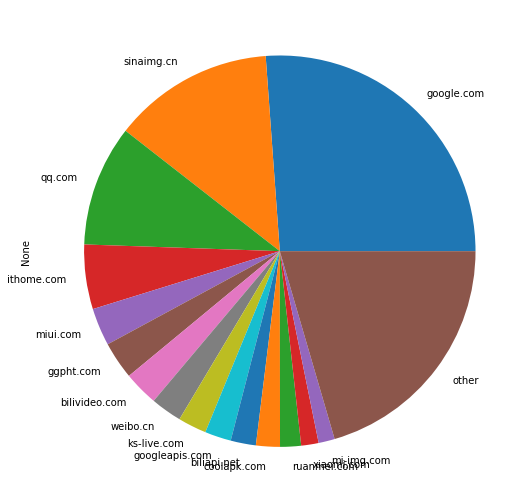

In [9]:
df_company_rank.plot(kind='pie', figsize = (9,9))

In [10]:
[items for items in df_company_rank.iteritems()]

[('google.com', 4496),
 ('sinaimg.cn', 2287),
 ('qq.com', 1719),
 ('ithome.com', 916),
 ('miui.com', 535),
 ('ggpht.com', 533),
 ('bilivideo.com', 492),
 ('weibo.cn', 443),
 ('ks-live.com', 405),
 ('googleapis.com', 374),
 ('biliapi.net', 358),
 ('coolapk.com', 339),
 ('ruanmei.com', 297),
 ('xiaomi.com', 247),
 ('mi-img.com', 230),
 ('other', 3521)]

In [11]:
data_company_cloud = []
for item in df_company_all.iteritems():
    name = item[0]
    name = name.replace('.com', '')
    name = name.replace('.cn', '')
    num = item[1]
    data_company_cloud.append((name, num))
    
data_company_cloud

[('google', 4496),
 ('sinaimg', 2287),
 ('qq', 1719),
 ('ithome', 916),
 ('miui', 535),
 ('ggpht', 533),
 ('bilivideo', 492),
 ('weibo', 443),
 ('ks-live', 405),
 ('googleapis', 374),
 ('biliapi.net', 358),
 ('coolapk', 339),
 ('ruanmei', 297),
 ('xiaomi', 247),
 ('mi-img', 230),
 ('jd', 179),
 ('bilibili', 166),
 ('hdslb', 146),
 ('weibo', 123),
 ('facebook', 117),
 ('alicdn', 106),
 ('twitter', 104),
 ('googlevideo', 97),
 ('googleusercontent', 88),
 ('gstatic', 83),
 ('smzdm', 81),
 ('qpic', 81),
 ('xiaomi.net', 77),
 ('qlogo', 73),
 ('coding.net', 71),
 ('office365', 70),
 ('amap', 70),
 ('doubanio', 66),
 ('douban', 65),
 ('gtimg', 63),
 ('alipay', 62),
 ('microsoft', 60),
 ('aliyuncs', 55),
 ('appcenter.ms', 53),
 ('ksyun', 43),
 ('githubusercontent', 42),
 ('twimg', 39),
 ('live', 39),
 ('pstatp', 39),
 ('gvt2', 35),
 ('youtube', 34),
 ('qingmang.me', 33),
 ('tanx', 31),
 ('v2ex', 31),
 ('qingmang.mobi', 29),
 ('360buyimg', 28),
 ('akamaized.net', 28),
 ('taobao', 27),
 ('zuihui

### 使用端口排行

<AxesSubplot:ylabel='None'>

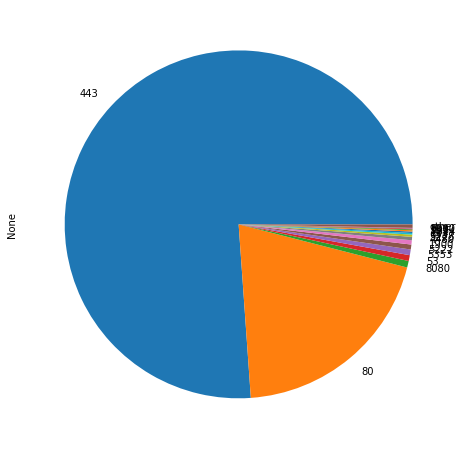

In [12]:
head_count = 15
df_port_all = df.groupby(['port']).count().sort_values(['time'], ascending=False)['time']
df_port_head = df_port_all.head(head_count)

new_row = pd.Series([df_port_all[head_count:].sum()], index=['other'])

vis_data_ports = pd.concat([df_port_head, new_row])
vis_data_ports.plot(kind='pie', figsize = (8,8))

In [13]:
[items for items in vis_data_ports.iteritems()]

[(443, 14824),
 (80, 3874),
 (8080, 119),
 (53, 105),
 (5353, 103),
 (5222, 89),
 (1900, 77),
 (4480, 61),
 (5228, 40),
 (6537, 28),
 (123, 27),
 (7824, 23),
 (993, 16),
 (137, 15),
 (8000, 11),
 ('other', 63)]

### 在晚上谁最活跃

<AxesSubplot:xlabel='company'>

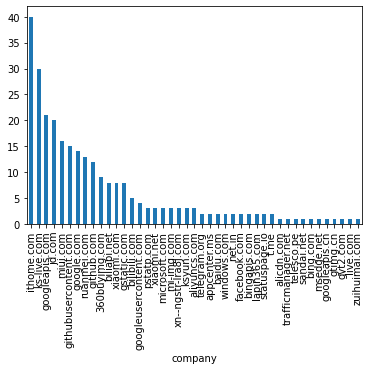

In [18]:
def is_night(time_stamp):
    night = (17, 23)
    arr = time_stamp.split(':')
    hour = int(arr[0])
    return night[0] < hour < night[1]

df_night = df_company[df_company['time'].apply(lambda x: is_night(x))]
df_night.groupby(['company']).count().sort_values(['time'], ascending=False)['time'][1:].plot(kind='bar')

In [19]:
df_night_head = df_night.groupby(['company']).count().sort_values(['time'], ascending=False)['time'][1:].head(30)

[items for items in df_night_head.iteritems()]

[('ithome.com', 40),
 ('ks-live.com', 30),
 ('googleapis.com', 21),
 ('jd.com', 20),
 ('miui.com', 16),
 ('githubusercontent.com', 15),
 ('google.com', 14),
 ('ruanmei.com', 13),
 ('github.com', 12),
 ('360buyimg.com', 9),
 ('biliapi.net', 8),
 ('xiaomi.com', 8),
 ('gstatic.com', 8),
 ('bilibili.com', 5),
 ('googleusercontent.com', 4),
 ('pstatp.com', 3),
 ('xiaomi.net', 3),
 ('microsoft.com', 3),
 ('mi-img.com', 3),
 ('xn--ngstr-lra8j.com', 3),
 ('ksyun.com', 3),
 ('aliyuncs.com', 3),
 ('telegram.org', 2),
 ('appcenter.ms', 2),
 ('baidu.com', 2),
 ('windows.com', 2),
 ('net.in', 2),
 ('facebook.com', 2),
 ('bingapis.com', 2),
 ('lapin365.com', 2)]

### 每日请求数量

<AxesSubplot:title={'center':'daily request sum'}, xlabel='day'>

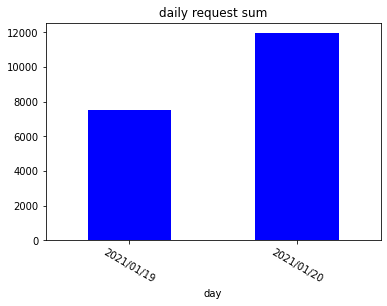

In [16]:
## 柱状图，每日请求数量
df.groupby(['day']).count()['domain'].plot(kind='bar', color='b', title='daily request sum', rot=-30)

### 运营商分布

In [17]:
data_vis_operator = df_company.groupby(['operator']).count().sort_values(['time'], ascending=False)['time']
[items for items in data_vis_operator.iteritems()]

[('移动', 9446),
 ('谷歌', 5777),
 ('电信', 439),
 ('微软', 314),
 ('0', 312),
 ('阿卡迈', 184),
 ('阿里云', 181),
 ('脸书', 145),
 ('阿里巴巴', 120),
 ('联通', 103),
 ('亚马逊', 80),
 ('Fastly', 58),
 ('铁通', 15),
 ('教育网', 6),
 ('威瑞森', 5),
 ('科进', 3),
 ('腾讯', 2),
 ('层峰网络', 1),
 ('内网IP', 1)]